## **In-Depth Exploration of Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a linear dimensionality-reduction technique that's essential in modern data science - both for exploratory analysis and as a preprocessing step in machine learning. Think of PCA as a way to compress data intelligently: instead of blindly throwing away columns, PCA looks at the patterns and structures in the data to decide which combinations of features matter the most. Having too many features leads to:

1. **Overfitting** – the model learns noise instead of patterns.
2. **Slower computation** – more features take more time to process.
3. **Redundancy** – many features are similar or correlated.
4. **Harder visualization** – you can't visualize more than 3 dimensions.

PCA reduces this complexity by finding new dimensions (called principal components) that summarize the data more efficiently. Here’s the key idea:

* Transform data from its original high-dimensional space into a new set of orthogonal axes - the principal components (PCs) - where each axis captures progressively less variance.
* Compress datasets by selecting only the top-k components, thereby approximating the original data with minimal information loss.

Why this matters:

* Curse of Dimensionality: High-dimensional data suffers from sparsity and noise, slowing down models and increasing overfitting risk.
* Efficiency: Reduces computational cost—fewer features mean faster training and inference.
* Visualization: Projects data into 2D/3D for human understanding.
* Noise reduction: Later components often represent noisy variance that can be dropped.
  
PCA thus enables you to derive a compressed representation that retains the core structure of the data without needing explicit labels or domain knowledge. PCA is used on **numerical data**, and ideally on **continuous variables**. It doesn't work well on categorical variables directly. It’s especially useful when:

* Features are highly correlated (e.g., income and spending).
* You want to visualize high-dimensional data in 2D or 3D.
* You need to clean up noisy data.
* You're building a model and want to **remove redundancy**.

---

## **How PCA Works: Step-by-Step**

#### 1. Data Preparation: Standardization

PCA is sensitive to scale. When features differ in scale (e.g., kilograms vs millimeters), those with large variance dominate. To avoid this:

```python
X_standardized = (X - mean) / std
```

All features end up with mean zero and unit variance.


#### 2. Covariance Matrix

When we apply PCA, we're looking to understand how features in our dataset vary together. The **covariance matrix** is a square matrix that captures these pairwise relationships between variables - i.e., whether two variables **increase or decrease together** (positive covariance), or if one increases when the other decreases (negative covariance), or if they are independent (zero covariance). Think of the covariance matrix as a **blueprint of the feature relationships**. PCA uses this blueprint to find the most informative directions (principal components). Suppose you have a dataset with **N features (dimensions)** and **m observations**. Let’s denote:

* $X$ as the **standardized data matrix** of shape $m \times N$ (i.e., each feature has mean = 0 and standard deviation = 1).
* The **covariance matrix** $C$ is calculated using the formula:

$$
\boxed{C = \frac{1}{m - 1} X^\top X}
$$

Where:

* $X^\top$ is the **transpose** of the standardized data matrix,
* The result $C$ is a square matrix of shape $N \times N$,
* Each element $c_{ij}$ of the matrix is the **covariance between the i-th and j-th features**.

The covariance matrix for an 8-feature dataset would be an **8×8** matrix, like this:

$$
C =
\begin{bmatrix}
\text{Var}(x_1) & \text{Cov}(x_1, x_2) & \dots & \text{Cov}(x_1, x_8) \\
\text{Cov}(x_2, x_1) & \text{Var}(x_2) & \dots & \text{Cov}(x_2, x_8) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(x_8, x_1) & \text{Cov}(x_8, x_2) & \dots & \text{Var}(x_8)
\end{bmatrix}
$$

The covariance matrix captures how features in a dataset vary both individually and in relation to each other.

* **Main diagonal** ($\text{Var}(x_i)$) shows the variance of each variable - how much it varies by itself.
* **Off-diagonal entries** ($\text{Cov}(x_i, x_j)$) show the covariance between different pairs - how much they vary together.
* The matrix is **symmetric**, meaning:

  $$
  \text{Cov}(x_i, x_j) = \text{Cov}(x_j, x_i)
  $$

##### Key Properties:

* The matrix is symmetric:
  $\text{Cov}(x_i, x_j) = \text{Cov}(x_j, x_i)$
* If $\text{Cov}(x_i, x_j) > 0$: Features tend to increase together.
* If $\text{Cov}(x_i, x_j) < 0$: One increases while the other decreases.
* If $\text{Cov}(x_i, x_j) = 0$: Features are uncorrelated.

It’s essential in dimensionality reduction techniques like PCA, where understanding feature relationships helps identify principal components.



#### 3. Eigen Decomposition (or SVD)

What we do now is :

* Compute the covariance matrix of the standardized data.
* Calculate eigenvalues and eigenvectors of this matrix.
     * Eigenvectors (w): These represent the new axes or directions in which the data is most spread out. Each eigenvector shows a direction in the original feature space.
     * Eigenvalues (λ): Each eigenvalue corresponds to an eigenvector and tells us how much variance (or spread) the data has in that direction.

Eigenvectors are mutually perpendicular (orthogonal) unit vectors that form a new coordinate system for the data. This new system aligns with the directions of maximum variance. When we transform the data onto these axes, we effectively rotate and re-scale the dataset so that the largest patterns in the data are captured in the first few dimensions.

Rather than directly computing eigenvalues and eigenvectors of the covariance matrix, we can alternatively use Singular Value Decomposition (SVD) on the original data matrix. SVD decomposes the data into three matrices and is numerically more stable, especially when working with large or ill-conditioned datasets. Both methods lead to the same principal components but through different paths.


#### 4. Sort and Select Components

Order the principal components based on descending eigenvalues, since higher eigenvalues indicate directions with more variance captured from the data.

* Explained variance ratio: This tells us how much proportion of the total variance is explained by each principal component. It is calculated as:
  $$
  \text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^n \lambda_j}
  $$
  where $\lambda_i$ is the eigenvalue for the $i^\text{th}$ component.

* Cumulative variance: This is the running total of explained variance ratios across components. It helps determine how many components are sufficient to capture most of the data's structure. A common guideline is to retain enough components to explain between 80% and 95% of the total variance.

To aid in this decision, visual tools like the scree plot are used. A scree plot displays the eigenvalues in descending order. The "elbow point" on this plot marks the point where adding more components yields diminishing returns in explained variance. Components beyond this point contribute little and can often be discarded without significant loss of information.

By selecting components up to this elbow or until a target cumulative variance is reached, we reduce dimensionality while preserving the essence of the data.



#### 5. Project Data into Lower Dimension

Form the projection matrix $W$ using the top-$k$ eigenvectors (those corresponding to the largest $k$ eigenvalues). Each eigenvector is a column in $W$:

$$
W = [w_1\ w_2\ \dots\ w_k]
$$

Then project the original data matrix $X$ (assumed to be mean-centered) onto this lower-dimensional space:

$$
T = XW
$$

Here, each row in $T$ is the reduced $k$-dimensional representation of the corresponding data point from $X$. This transformation preserves the directions with the most variance and discards less informative dimensions.

--- 

## **Intuition behind Minimizing Projection Error**

PCA can be interpreted as minimizing the total squared reconstruction error - the distances between the original data points and their projections onto a lower-dimensional subspace.

For the case of $k = 1$, PCA is equivalent to solving the following optimization problem:

$$
\max_{\mathbf{w}_1} \ \mathbf{w}_1^T S \mathbf{w}_1
$$

Subject to:

$$
\|\mathbf{w}_1\| = 1
$$

Here, $S$ is the covariance matrix of the centered data, and $\mathbf{w}_1$ is the direction (a unit vector) that maximizes the variance of the projected data. The solution to this problem is the eigenvector corresponding to the largest eigenvalue of $S$, which ensures:

* Maximum variance is retained along $\mathbf{w}_1$
* The projected data points lie as close as possible (in squared distance) to the one-dimensional subspace spanned by $\mathbf{w}_1$

For higher dimensions ($k > 1$), PCA continues this process by finding successive eigenvectors $\mathbf{w}_2, \mathbf{w}_3, \dots, \mathbf{w}_k$, each of which:

* Is orthogonal to the previously selected vectors
* Captures the next highest remaining variance in the data

This guarantees that each new principal component adds independent information and contributes to capturing the underlying structure of the data.

**Describing it using Exmaple:**

PCA tries to find new axes (directions) that capture the most spread (variance) in the data. It does this by:

1. Finding the direction (vector) along which the data varies the most.
2. Projecting the data onto that direction.
3. Then, finding the next direction that is orthogonal (at 90°) to the first and captures the next most variance.
4. And so on...

Each of these directions is called a principal component, and they help us represent the data using fewer dimensions without losing much information.

Suppose we have 2D data:

| Height (cm) | Weight (kg) |
| ----------- | ----------- |
| 160         | 60          |
| 165         | 65          |
| 170         | 68          |
| 175         | 72          |
| 180         | 75          |

If you plot this data, you’ll notice that as height increases, weight also increases - they are correlated.

PCA will find:

* The **first principal component** (PC1) — a line that goes diagonally through the data (in the direction of height-weight increase). This line captures the most variance.
* The **second principal component** (PC2) — a line perpendicular to PC1, capturing the remaining minor variations.

If we want to reduce from 2D to 1D (k = 1), PCA will project all the data points onto PC1. This reduces dimensionality but keeps most of the information (variance).

PCA finds a direction $\mathbf{w}_1$ (first principal component) such that when you project the data onto this line, the variance is maximized:

$$
\max_{\mathbf{w}_1} \ \mathbf{w}_1^T S \mathbf{w}_1 \quad \text{subject to} \quad \|\mathbf{w}_1\| = 1
$$

The solution is the **eigenvector** of the **largest eigenvalue** of the covariance matrix $S$.

By projecting the data onto this line, you are minimizing the **squared distance** from each original point to its projection — which means you're keeping the projection as close to the original as possible, in fewer dimensions.

---


## **Linear Combinations of Original Features**

Each principal component (PC) is a weighted combination of the original features. Suppose we have three features: $X, Y, Z$. Then the first principal component (PC1) can be written as:

$$
\text{PC}_1 = aX + bY + cZ
$$

Here, $a, b, c$ are the weights that determine how much each feature contributes to PC1. These weights come from the eigenvector corresponding to the largest eigenvalue of the covariance matrix.

* The first PC captures the maximum combined variation across all features.
* The second PC is orthogonal (uncorrelated) to the first and captures the next highest variance left in the data.
* This process continues for as many components as you choose.

When we plot the data using just the first two principal components (PC1 and PC2), patterns in the data often become clearer. For example:

* Clusters of similar data points may become visible.
* Class boundaries may separate better.
* Outliers may stand out more.

This makes PCA useful not just for dimensionality reduction but also as a preprocessing step for tasks like classification, clustering, or anomaly detection.

---
## **Step-by-Step Process of Applying PCA in Code**

#### Step 1: Handle Missing Values (NaNs)

Before performing PCA, the dataset must be cleaned. If it contains missing values (`NaN`), PCA cannot work correctly because it requires a complete matrix of numerical data.

* **Remove rows/columns** with missing values if they are few and not crucial.
* **Impute** missing values using methods like:

  * Mean/median imputation
  * K-nearest neighbors (KNN)
  * Forward/backward fill (for time series)

PCA is based on variance and correlations between variables. Missing values distort these relationships.


#### Step 2: Handle Categorical Variables

PCA works only on numerical data. If your dataset has categorical columns like `Gender`, `City`, or `Product Type`, these need to be converted into numbers using one-hot encoding or likewise.

* Use one-hot encoding to convert each category into its own binary (0/1) column.

  * E.g., `Gender: Male/Female` → `Gender_Male`, `Gender_Female`

Categorical labels carry no notion of distance or variance. PCA needs numerical input that reflects quantity or magnitude.



#### Step 3: Standardize the Data

After converting everything into numeric format, you must standardize the dataset. This means scaling the data so each feature has mean = 0 and standard deviation = 1.

* Use `StandardScaler` or similar tool.
* It transforms each column so it has: Centered data around 0 and Equal spread

PCA is sensitive to scale. A feature with large values (e.g., income in dollars) can dominate others (e.g., rating scores from 1–5) if not standardized.


#### Step 4: Apply PCA

Once the data is clean and standardized, PCA is applied. Suppose your data now has 8 numeric columns. PCA will create 8 new features (principal components). Each of these new features is a linear combination of the original 8 columns. They are arranged in order of how much variance they capture. PC1 captures the most variation in the data. PC2 captures the next most variation, and so on.

You now have 8 principal components, but you won’t use all of them.


#### Step 5: Understand the Importance of Each Principal Component

Once PCA is done, you'll want to decide how many components to keep. You can do this by looking at the `explained_variance_ratio_` attribute from your PCA object. It tells you how much of the total variation is explained by each component.

Example output:

| Component | Explained Variance Ratio |
| --------- | ------------------------ |
| PC1       | 0.42                     |
| PC2       | 0.22                     |
| PC3       | 0.11                     |
| PC4       | 0.07                     |
| PC5       | 0.06                     |
| PC6       | 0.05                     |
| PC7       | 0.04                     |
| PC8       | 0.03                     |

The values decrease as you move to later components. This is by design - PCA ranks components from most to least important.


#### Step 6: Visualize the Variance Explained

##### Bar Chart of Individual Variance

You can draw a bar chart showing how much each individual component contributes to explaining the data. This helps you understand:

* Which component captures the most variance
* When the usefulness starts tapering off

##### Cumulative Variance Plot

This is the most useful graph in PCA. Plot a cumulative sum of explained variance. For example:

| Components | Cumulative Variance |
| ---------- | ------------------- |
| PC1        | 0.42                |
| PC2        | 0.64                |
| PC3        | 0.75                |
| PC4        | 0.82                |


This tells you how many components you need to retain to capture a meaningful amount of total information. A common threshold is **80%**.

#### Step 7: Choose Number of Components

From the cumulative variance plot above, we see that:

* PC1 to PC4 together capture 82% of the total variation.
* That means you can keep just the first 4 components and drop the rest.

Now, your 8-column dataset is transformed into a 4-column dataset, with minimal loss of information.



#### Step 8: Transform and Use the New Data

Use the PCA object to transform the original standardized dataset into the new principal component space.

Your new dataset now looks like:

| PC1 | PC2  | PC3 | PC4 |
| --- | ---- | --- | --- |
| 1.2 | -0.9 | 0.3 | 2.1 |
| 0.5 | -0.1 | 0.7 | 1.4 |
| ... | ...  | ... | ... |

This dataset can now be:

* Used for **visualization** (PC1 vs PC2)
* Fed into **machine learning models**
* Used for **clustering** or **anomaly detection**
* Stored or processed **more efficiently**


---

## **Practical Choices in PCA**

#### How Many PCs to Choose?

There's no one-size-fits-all answer. Common criteria include:

* Variance threshold: Keep PCs until cumulative explained variance hits a threshold (e.g., 90%).
* Eigenvalue cutoff (Kaiser rule): Retain PCs with eigenvalue ≥ 1, assuming unit-variance standardization.
* Scree plot elbow: Choose components before the curve flattens.

#### Assumptions & Limitations

PCA has a few important assumptions and limitations that must be understood when applying it to real-world data:

* Linearity: PCA works by finding directions in the data that linearly explain the most variance. This means it assumes that the important structure in your data lies along straight-line relationships between variables. If your data has complex, curved patterns (like concentric circles or spirals), PCA won’t capture that structure effectively. In such cases, methods like kernel PCA or t-SNE are better suited because they can handle nonlinear relationships.

* Centering: Before applying PCA, you must subtract the mean from each feature, so that each feature has a mean of zero. This is called mean-centering. If you skip this step, PCA will not work correctly because the first principal component might point in the direction of the mean rather than the direction of maximum variance. Centering ensures that the principal components reflect the actual structure and spread of the data.

* Scale dependency: PCA is sensitive to the relative scale of features. For example, if one feature is in centimeters and another is in kilometers, the larger-scale feature will dominate the principal components. To avoid this, features should be standardized - so that each has zero mean and unit variance. This makes sure that all features contribute equally when calculating variance and correlations.


#### Variants of PCA

* Sparse PCA: This variation of PCA introduces sparsity into the principal components, meaning that each component is a combination of only a few original features. This makes the components easier to interpret, especially when dealing with high-dimensional data, such as in genetics or text analysis. It does so by adding a regularization term that pushes some weights in the eigenvectors to zero.

* Kernel PCA: Kernel PCA extends traditional PCA to capture nonlinear relationships in the data. It uses the kernel trick to implicitly map the data into a higher-dimensional space where linear separation is possible. Then it performs PCA in that new space. This is useful for datasets where the structure lies along curved or nonlinear manifolds, such as image, speech, or complex biological data.

* Incremental PCA: This is a memory-efficient version of PCA designed to work with large datasets or data that comes in chunks, such as streaming data. Instead of computing the decomposition on the full dataset all at once, it updates the principal components incrementally as new data arrives. This allows PCA to scale to large volumes of data that cannot fit entirely in memory.

## Coding in Python

In [1]:
# Importing necessary libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Loading dataset

data = pd.read_csv('California_Real_Estate.csv', sep=';')
df_real_estate = data.copy()  # Keeping a copy of original dataset
df_real_estate.head()

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1


In [3]:
# Checking for null

df_real_estate.isna().sum()

Building             0
Year of sale        72
Month of sale       72
Type of property     0
Property #          60
Area (ft.)           0
Price                0
Status               0
dtype: int64

In [5]:
df_real_estate['Status'].value_counts()

Status
1    195
0     72
Name: count, dtype: int64

In [4]:
df_real_estate[df_real_estate['Status'] == 1].isna().sum()

Building            0
Year of sale        0
Month of sale       0
Type of property    0
Property #          0
Area (ft.)          0
Price               0
Status              0
dtype: int64

In [6]:
# Let's discard the rows with Null values for now - Since Status with 0 has nulls, we will take the Status with 1

df_real_estate_nonull = df_real_estate[df_real_estate['Status'] == 1]
df_real_estate_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 195
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Building          195 non-null    int64  
 1   Year of sale      195 non-null    float64
 2   Month of sale     195 non-null    float64
 3   Type of property  195 non-null    int64  
 4   Property #        195 non-null    float64
 5   Area (ft.)        195 non-null    int64  
 6   Price             195 non-null    int64  
 7   Status            195 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 13.7 KB


In [7]:
df_real_estate_nonull.describe()

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0
mean,2.564103,2006.333333,7.271795,0.035897,27.328205,899.835897,269434.564103,1.0
std,1.243434,1.072941,3.378674,0.186513,14.830832,261.484883,80129.054039,0.0
min,1.000000,2004.000000,1.000000,0.000000,1.000000,411.000000,117564.000000,1.0
25%,2.000000,2006.000000,4.000000,0.000000,15.000000,740.000000,212393.500000,1.0
50%,2.000000,2007.000000,8.000000,0.000000,27.000000,785.000000,243053.000000,1.0
75%,3.000000,2007.000000,10.000000,0.000000,39.000000,1075.500000,308550.500000,1.0
max,5.000000,2010.000000,12.000000,1.000000,59.000000,1943.000000,529317.000000,1.0


In [8]:
# Looking at above, we can see that we need to Standardize our data

scaler = StandardScaler()
df_re_nonull_std = scaler.fit_transform(df_real_estate_nonull)

In [10]:
# Now we can apply PCA on top of it - but without components first as we want to find out the required number of components

pca = PCA()
pca.fit_transform(df_re_nonull_std)

array([[-0.60734881, -1.31926442,  0.57906783, ...,  0.25542486,
        -0.2337479 ,  0.        ],
       [-0.58105774, -1.34289556,  0.32392824, ...,  0.18273758,
        -0.199292  ,  0.        ],
       [-1.8398805 ,  0.1606641 , -0.29157809, ...,  0.71379278,
        -0.2905317 ,  0.        ],
       ...,
       [-1.03970034, -1.18485044, -0.6530342 , ...,  0.00559872,
        -0.19757116,  0.        ],
       [-0.76196533, -1.19268984, -0.64690188, ...,  0.00744995,
         0.28604396,  0.        ],
       [-0.82936359, -1.09937408, -0.7236547 , ...,  0.01692015,
        -0.20697981,  0.        ]])

In [11]:
pca.explained_variance_ratio_

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

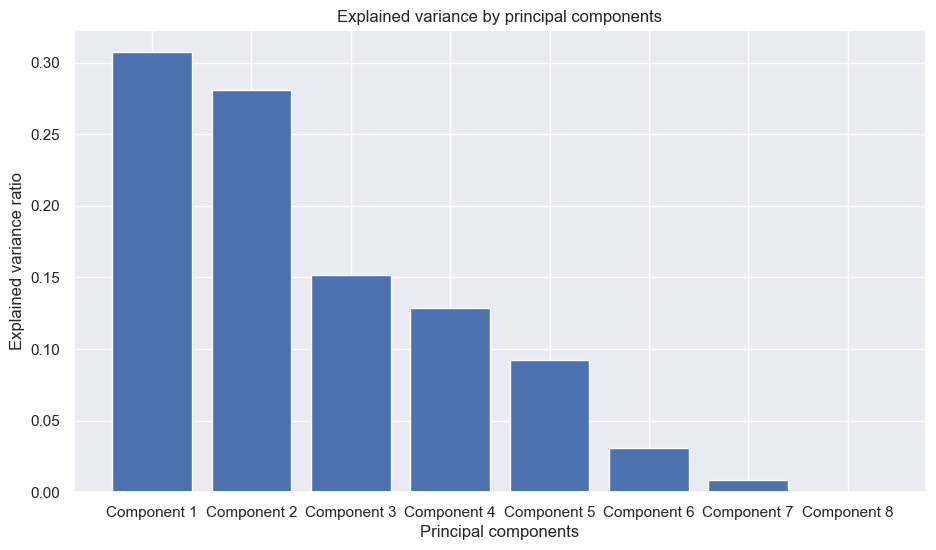

In [12]:
# Let's visualize the variance ratio explained by each component

plt.figure(figsize = (11,6))
components = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7','Component 8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

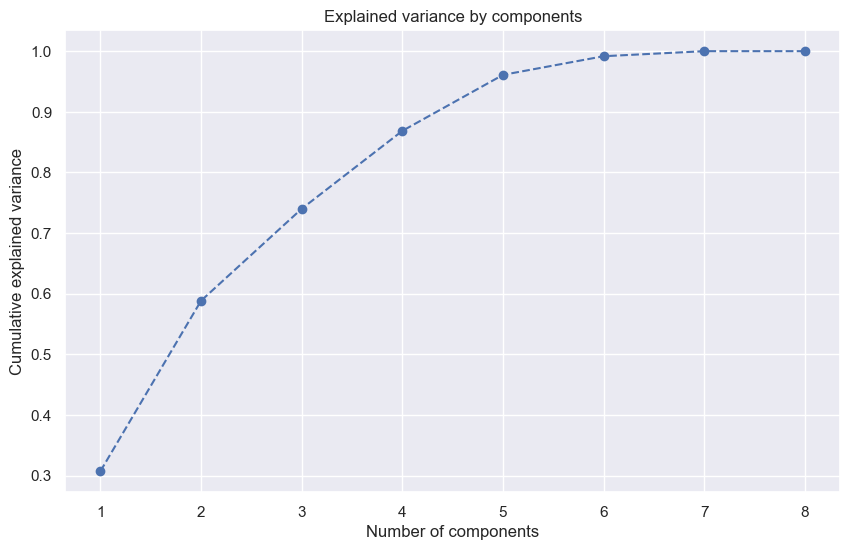

In [13]:
# Now we will see the cumulative variance

plt.figure(figsize=(10,6))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [14]:
# From above, we can see that having 4 components is enough to explain more than 80% of variance
# Re-initialize PCA

pca = PCA(n_components=4)
pca.fit(df_re_nonull_std)

PCA(n_components=4)

In [15]:
pca.components_

array([[-0.01347829,  0.06534594, -0.06689355, -0.15099905,  0.39492744,
         0.63949973,  0.63509464,  0.        ],
       [ 0.61576753,  0.62980998,  0.02208123, -0.4114363 ,  0.15693164,
        -0.12506318, -0.11888648,  0.        ],
       [ 0.2675697 , -0.06682334,  0.90927776,  0.22605443, -0.12937694,
         0.11386435,  0.1278709 ,  0.        ],
       [-0.26715037, -0.33315704,  0.3274807 , -0.55432795,  0.56219835,
        -0.20000856, -0.21689532, -0.        ]])

In [16]:
# let's create dataframe showing how much each original feature contributes to each of the first four principal components

df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns=df_real_estate.columns.values,
                           index=['Component 1','Component 2','Component 3','Component 4'])
df_pca_comp

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
Component 1,-0.013478,0.065346,-0.066894,-0.150999,0.394927,0.639500,0.635095,0.0
Component 2,0.615768,0.629810,0.022081,-0.411436,0.156932,-0.125063,-0.118886,0.0
Component 3,0.267570,-0.066823,0.909278,0.226054,-0.129377,0.113864,0.127871,0.0
Component 4,-0.267150,-0.333157,0.327481,-0.554328,0.562198,-0.200009,-0.216895,-0.0


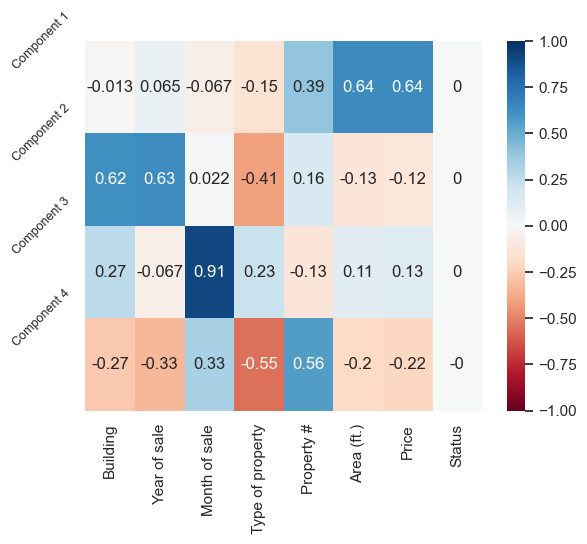

In [17]:
# Let's visualize above in heatmap

sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)

plt.yticks([0,1,2,3],
          ['Component 1','Component 2','Component 3','Component 4'],
          rotation=45,
          fontsize=9)

plt.show()

PC1 is highly correlated with area and price, with highest values on row. Thus, the first component represents the characteristics of the property which are important for sales. 

PC2 has high correlation with building and year of sales and moderately high negative correlation with type of property. Thus, we can say that component 2 has relationship with building characteristics.

PC3 is very highly correlated with month of sales, which means it might indicate seasonality in sales.

PC4 has type of property and property number as lowest and highest respectively.

In [19]:
df_re_nonull_std_pca = pca.transform(df_re_nonull_std)

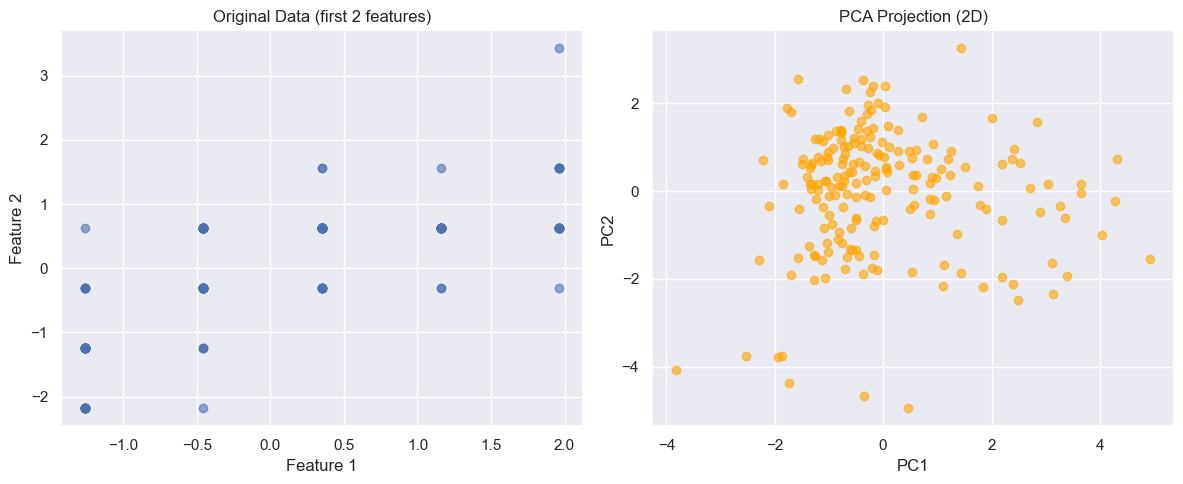

In [27]:
# Let's view original data and PCA projected data

plt.figure(figsize=(12, 5))

# Plot original in PCA-reduced 2D
plt.subplot(1, 2, 1)
plt.scatter(df_re_nonull_std[:, 0], df_re_nonull_std[:, 1], alpha=0.6)
plt.title("Original Data (first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot PCA-projected data
plt.subplot(1, 2, 2)
plt.scatter(df_re_nonull_std_pca[:, 0], df_re_nonull_std_pca[:, 1], alpha=0.6, color='orange')
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


In [28]:
# Using simple KMeans to look at the way to use PCA data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_re_nonull_std_pca)

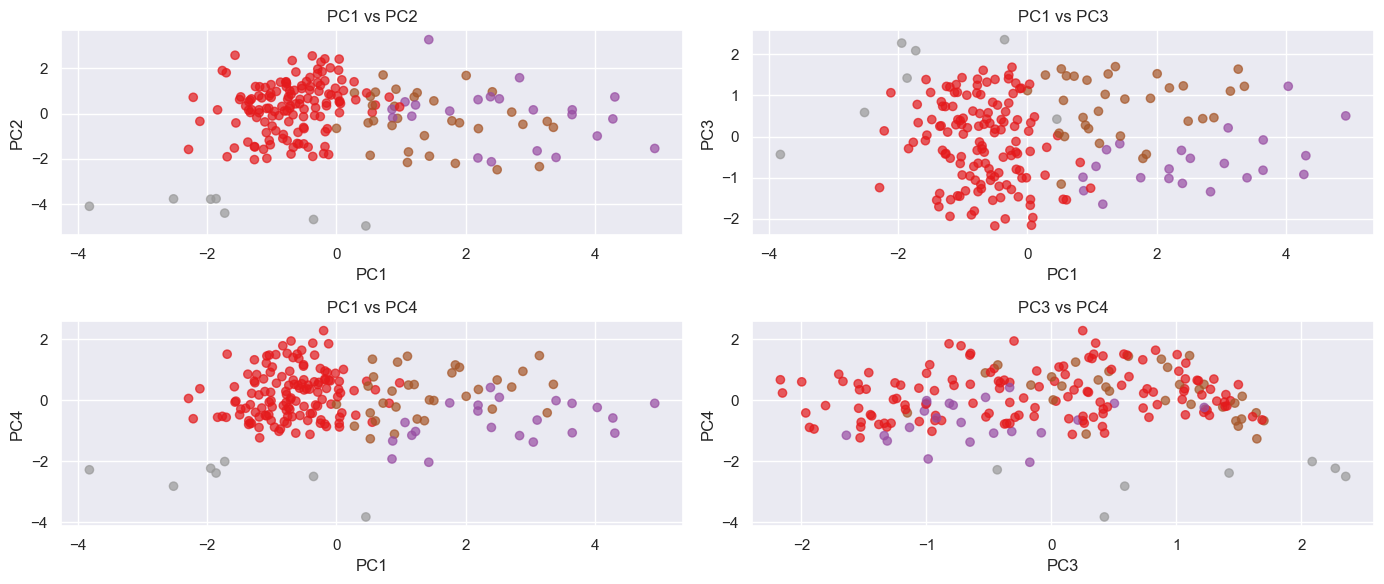

In [29]:
plt.figure(figsize=(14, 6))

# PC1 vs PC2
plt.subplot(2, 2, 1)
plt.scatter(df_re_nonull_std_pca[:, 0], df_re_nonull_std_pca[:, 1], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")

# PC1 vs PC3
plt.subplot(2, 2, 2)
plt.scatter(df_re_nonull_std_pca[:, 0], df_re_nonull_std_pca[:, 2], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.title("PC1 vs PC3")

# PC1 vs PC4
plt.subplot(2, 2, 3)
plt.scatter(df_re_nonull_std_pca[:, 0], df_re_nonull_std_pca[:, 3], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC4")
plt.title("PC1 vs PC4")

# PC3 vs PC4
plt.subplot(2, 2, 4)
plt.scatter(df_re_nonull_std_pca[:, 2], df_re_nonull_std_pca[:, 3], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("PC3 vs PC4")

plt.tight_layout()
plt.show()


The graph shows pairwise scatter plots of the first 4 principal components (PC1 to PC4) after applying PCA on your dataset, with colors indicating the cluster assignments from K-means clustering.

* PC1 is clearly the most important component: It creates visible separation across almost all plots, especially in PC1 vs PC2 and PC1 vs PC3. Most of the cluster separation happens along PC1's axis.
* Clusters are visually separable: The red, brown, and purple clusters are forming distinct regions, suggesting meaningful grouping in the reduced PCA space.
* PC3 and PC4 capture subtler variance: These components show some spread but contribute less to the separation. PC3 vs PC4 shows overlap, meaning they add less discriminative power.
* Outliers: A few gray points lie far from the main clusters, possibly indicating noise or outliers that don't fit into any cluster well.